In [2]:
import pandas as pd
df = pd.read_csv("upi_transactions_2024.csv")

In [3]:
df.head()


,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0


In [5]:
df.shape

(250000, 17)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

In [7]:
df.describe()

,amount (INR),fraud_flag,hour_of_day,is_weekend
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,1311.756036,0.001920,14.681032,0.285348
std,1848.059224,0.043776,5.188304,0.451581
min,10.000000,0.000000,0.000000,0.000000
25%,288.000000,0.000000,11.000000,0.000000
50%,629.000000,0.000000,15.000000,0.000000
75%,1596.000000,0.000000,19.000000,1.000000
max,42099.000000,1.000000,23.000000,1.000000


In [8]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: >

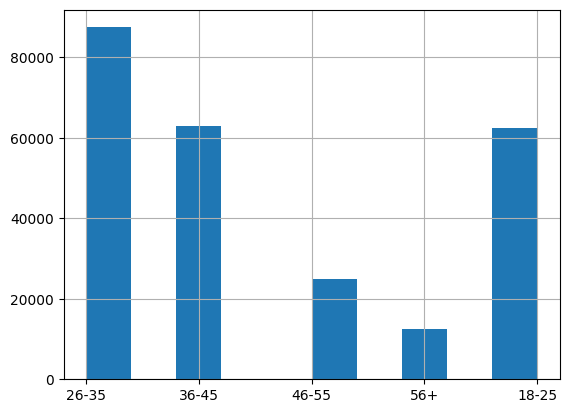

In [9]:
df['sender_age_group'].hist()

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns


In [12]:
plt.show()


Numeric columns: ['amount (INR)', 'fraud_flag', 'hour_of_day', 'is_weekend']


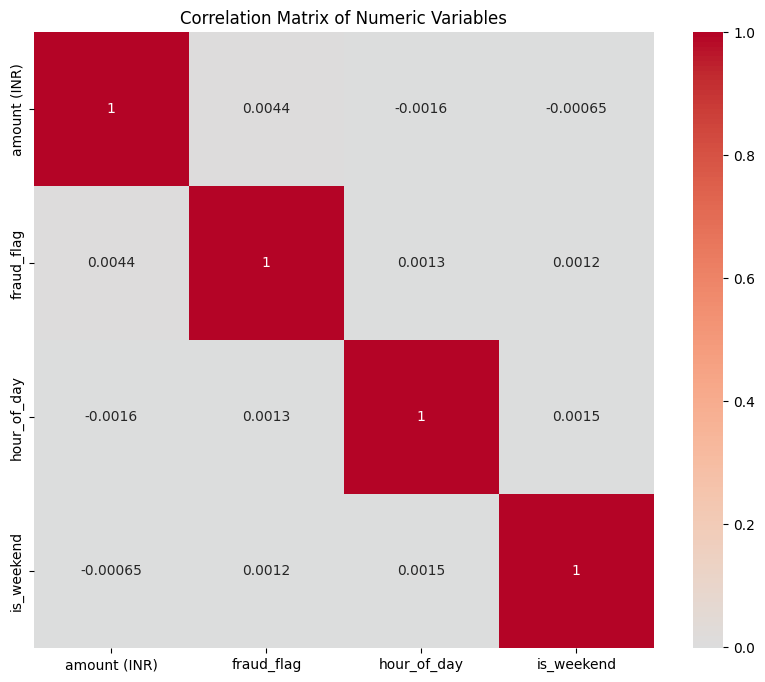

In [17]:
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
print("Numeric columns:", numeric_columns.columns.tolist())

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [18]:
#finding the unique values in catagorical columns

In [19]:
#first we find the categorical columns

In [20]:
df = pd.read_csv("upi_transactions_2024.csv")
categorical_columns = df.select_dtypes(include='object').columns
print(categorical_columns)

Index(['transaction id', 'timestamp', 'transaction type', 'merchant_category',
       'transaction_status', 'sender_age_group', 'receiver_age_group',
       'sender_state', 'sender_bank', 'receiver_bank', 'device_type',
       'network_type', 'day_of_week'],
      dtype='object')


In [21]:
for col in categorical_columns:
    unique_values = df[col].nunique()
    print(f"Column '{col}' has {unique_values} unique values.")

Column 'transaction id' has 250000 unique values.
Column 'timestamp' has 248610 unique values.
Column 'transaction type' has 4 unique values.
Column 'merchant_category' has 10 unique values.
Column 'transaction_status' has 2 unique values.
Column 'sender_age_group' has 5 unique values.
Column 'receiver_age_group' has 5 unique values.
Column 'sender_state' has 10 unique values.
Column 'sender_bank' has 8 unique values.
Column 'receiver_bank' has 8 unique values.
Column 'device_type' has 3 unique values.
Column 'network_type' has 4 unique values.
Column 'day_of_week' has 7 unique values.


In [23]:
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Column '{col}' has {unique_values} unique values.")

Column 'transaction id' has ['TXN0000000001' 'TXN0000000002' 'TXN0000000003' ... 'TXN0000249998'
 'TXN0000249999' 'TXN0000250000'] unique values.
Column 'timestamp' has ['2024-10-08 15:17:28' '2024-04-11 06:56:00' '2024-04-02 13:27:18' ...
 '2024-11-27 16:33:25' '2024-01-05 13:31:30' '2024-01-17 15:23:07'] unique values.
Column 'transaction type' has ['P2P' 'P2M' 'Bill Payment' 'Recharge'] unique values.
Column 'merchant_category' has ['Entertainment' 'Grocery' 'Fuel' 'Shopping' 'Food' 'Other' 'Utilities'
 'Transport' 'Healthcare' 'Education'] unique values.
Column 'transaction_status' has ['SUCCESS' 'FAILED'] unique values.
Column 'sender_age_group' has ['26-35' '36-45' '46-55' '56+' '18-25'] unique values.
Column 'receiver_age_group' has ['18-25' '26-35' '36-45' '46-55' '56+'] unique values.
Column 'sender_state' has ['Delhi' 'Uttar Pradesh' 'Karnataka' 'Telangana' 'Maharashtra' 'Gujarat'
 'Rajasthan' 'Tamil Nadu' 'West Bengal' 'Andhra Pradesh'] unique values.
Column 'sender_bank' ha

In [24]:
#now for the internal cibil and external cibil datasets

In [25]:
df1 = pd.read_excel("Internal_Bank_Dataset.xlsx")

In [26]:
df1.head()


,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [27]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [28]:
df1.shape

(51336, 26)

In [29]:
df1.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL'],
      dtype='object')

In [30]:
df.columns

Index(['transaction id', 'timestamp', 'transaction type', 'merchant_category',
       'amount (INR)', 'transaction_status', 'sender_age_group',
       'receiver_age_group', 'sender_state', 'sender_bank', 'receiver_bank',
       'device_type', 'network_type', 'fraud_flag', 'hour_of_day',
       'day_of_week', 'is_weekend'],
      dtype='object')

In [31]:
df = df.drop(['transaction_id','timestamp','hour_of_day','day_of_week','month','sender_account_id','receiver_account_id'], axis=1),inplace=True

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1842127048.py, line 1)

In [32]:
df = df.drop(['transaction_id','timestamp','hour_of_day','day_of_week','month','sender_account_id','receiver_account_id'], axis=1, inplace=True)


KeyError: "['transaction_id', 'month', 'sender_account_id', 'receiver_account_id'] not found in axis"

In [34]:
df = df.drop(['transaction_id','timestamp','hour_of_day','day_of_week','month','sender_account_id','receiver_account_id'], axis=1)

KeyError: "['transaction_id', 'month', 'sender_account_id', 'receiver_account_id'] not found in axis"

In [36]:
columns_to_drop = ['transaction id', 'timestamp', 'hour_of_day', 'day_of_week']
df = df.drop(columns_to_drop, axis=1)

In [38]:
df.write.csv("upi_transactions_2024.csv", index=False)

AttributeError: 'DataFrame' object has no attribute 'write'

In [39]:
df.to_csv("upi_transactions_2024.csv", index=False)

In [40]:
df = df.drop('is_weekend', axis=1)

In [41]:
df.to_csv("upi_transactions_2024.csv", index=False)


In [42]:
df = df.drop('transaction_status',axis=1)

In [43]:
df.to_csv("upi_transactions_2024.csv", index=False)